#  CONVETRY UNIVERSITY
# Information Retrieval (STW7071CEM)
## TASK 2

### Submitted by BIPLUCK SHRESTHA
#### Coventry ID : 14224395
##### 230103@softwarica.edu.np


Task 2: Subject Classification
A subject classification functionality is also required, whether as a standalone software or linked
with a search engine. More specifically, the input is a scientific document, and the output is one of
zero or more of the following cases: Health, business, and Sport are all areas of study.

* Business
* Health
* Sport

#### YOUTUBE : https://www.youtube.com/watch?v=0EzpihrEeIQ
#### GOOGLE DRIVE : https://drive.google.com/drive/folders/1vzfleclxC2Rzbh06oVhmoKdaJf-NPl3u?usp=sharing
#### GITHUB : https://github.com/bipkorn/information_retrieval_assigment_2023

# PREVIEW

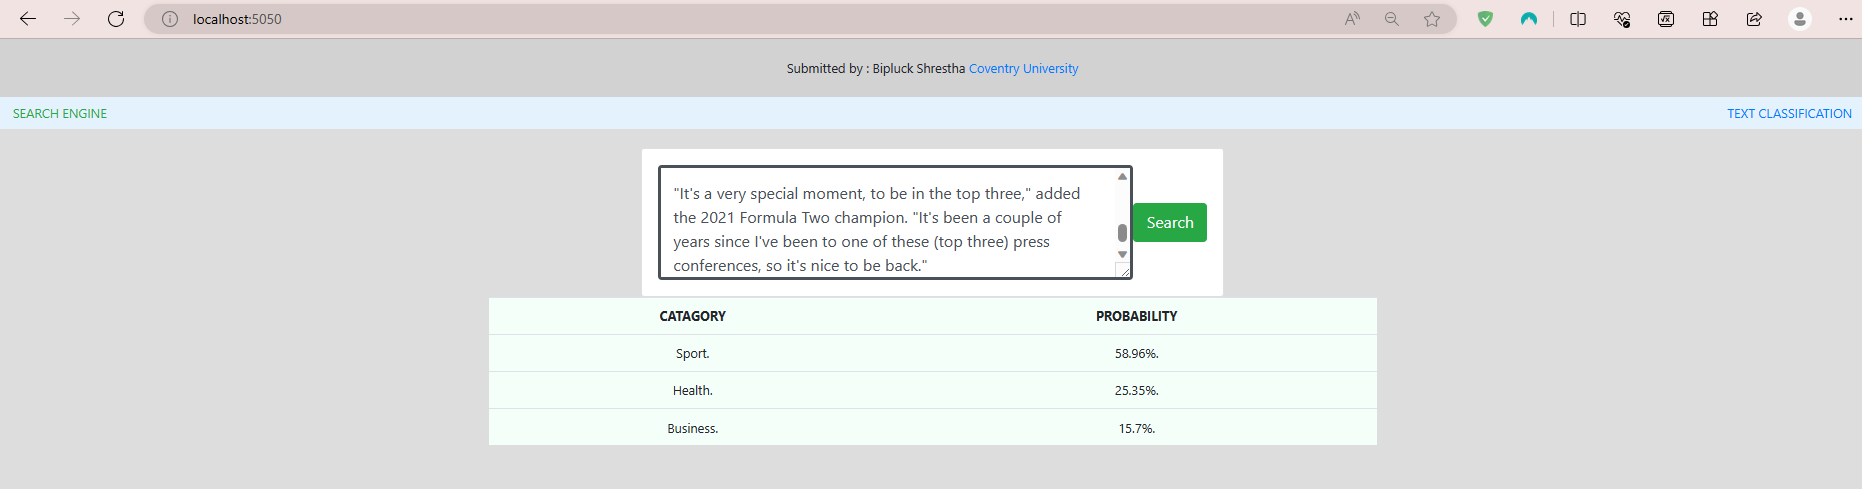

## Introduction 
The goal of this assignment is to create a standalone search engine that can classify scientific documents into different areas of study. More specifically, the input is a scientific document, and the output is one of zero or more of the following cases: Health, business, and Sport. The search engine should be able to handle documents from various disciplines and domains, and use natural language processing techniques to extract relevant keywords and concepts. The search engine should also be able to rank the results according to their relevance and quality.

Subject classification is a valuable tool in scientific document management systems. It simplifies the organization and retrieval of documents by categorizing them into subject areas like Health, Business, and Sport. This functionality, whether integrated with a search engine or standalone, enhances the user experience by enabling efficient access to relevant scientific information. With subject classification, researchers, students, and professionals can easily navigate through vast collections of documents and find precisely what they need. It's like having a knowledgeable guide who understands their interests and guides them to the right resources. Subject classification adds a human touch to information retrieval, making the exploration of scientific knowledge more intuitive and rewarding.


The query processor reads the user's input and processes the query to match it with the indexed data. The classification
function performs the search and delivers the relevant results. A graphical user interface (GUI) is created in the code using the 
flask  library, and the search function is called when the user clicks the "Search" button. After installing the required packages
and making the necessary changes, you can run the code and use the search engine through the website  http://localhost:5050. The code is written in python.

## Imports Package

The following is the code that helps and import the packages that the application requires.the imports them using the import statement. This ensures that the
application has access to the latest versions and features of the packages.

In [1]:
import os
import string

import pandas as pd
import numpy as np
import re
from scipy import interp


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# NLP Packages
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
from joblib import dump, load

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier

# Scikit Learn packages
from sklearn.base import clone
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, cross_validate, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


# Load Datasets

The code creates an empty DataFrame with two columns and then displays the first five rows of the DataFrame, which will be empty.

In [2]:
text_df = pd.DataFrame(columns=['Text','Class'])
#text_df.to_csv('training_df.csv')
text_df.head()

,Text,Class


the function reads text files from a directory, extracts their content, appends the content along with the specified category to an existing DataFrame, and saves the updated DataFrame to a CSV file. The function assumes that the CSV file exists and has the expected structure with columns named 'Text' and 'Class'.

In [3]:
# Function to read the text files into one dataframe
def readfiles_to_dataframe(directory, category):
    arr = os.listdir(directory)
    strtext = ".txt"
    for textfile in arr:
        if textfile.__contains__(strtext):
            fileObject = open(directory + textfile, "r")
            data = fileObject.read()
            ouvert = pd.read_csv('training_df.csv', index_col="Unnamed: 0")
            ouvert = ouvert.append({"Class": str(category), "Text": data},ignore_index=True)
            ouvert.to_csv('training_df.csv')   

# Define categories             
# paths = [business_path, tech_path, arts_path]
# categories = ['business', 'tech', 'arts']


# # Call readfile function
# for path,category in zip(paths, categories):
#     readfiles_to_dataframe(path, category)

The code reads a CSV file into a DataFrame, prints the shape of the DataFrame, and displays the first few rows of the DataFrame.

In [4]:
full_df = pd.read_csv('training_df.csv')
print(full_df.shape)
full_df.head()

(190, 3)


,Unnamed: 0,Text,Class
0,0,The Impact of Physical Activity on Mental Health,Health
1,1,The Role of Technology in Modern Healthcare,Health
2,2,The Importance of Financial Management in Busi...,Business
3,3,The Benefits of Teamwork in Sports,Sport
4,4,The Link Between Nutrition and Physical Perfor...,Health


The code drops the column 'Unnamed: 0' from the DataFrame full_df and then displays the first few rows of the modified DataFrame. The inplace=True parameter ensures that the changes are applied directly to full_df without creating a new DataFrame.

In [5]:
full_df.drop(columns=['Unnamed: 0'], inplace=True)
full_df.head()

,Text,Class
0,The Impact of Physical Activity on Mental Health,Health
1,The Role of Technology in Modern Healthcare,Health
2,The Importance of Financial Management in Busi...,Business
3,The Benefits of Teamwork in Sports,Sport
4,The Link Between Nutrition and Physical Perfor...,Health


## 1. Dataset Exploration

In [6]:
print(full_df['Text'])
#full_df['Class'].value_counts().plot(kind='bar')
#plt.title('Number of News articles per Category', size=20, pad=20);

0       The Impact of Physical Activity on Mental Health
1            The Role of Technology in Modern Healthcare
2      The Importance of Financial Management in Busi...
3                     The Benefits of Teamwork in Sports
4      The Link Between Nutrition and Physical Perfor...
                             ...                        
185    The Role of Exercise in Managing Chronic Condi...
186    The Connection Between Mental Health and Lonel...
187    The Importance of Innovation in Business Susta...
188    The Benefits of Sports for Leadership Development
189    The Impact of Social Media Advertising on Cons...
Name: Text, Length: 190, dtype: object


In [7]:
# Check for missing values
full_df.isna().sum()

Text     0
Class    0
dtype: int64

## 2. Text Preprocessing

Here, unwanted parts of the text are removed such as special characters. 

stop_words = stopwords.words("english"): This line assigns a list of English stopwords to the variable stop_words. Stopwords are common words that are often removed from text as they typically do not carry significant meaning.

lemmatizer = WordNetLemmatizer(): This line creates an instance of the WordNet Lemmatizer from the NLTK library. Lemmatization is the process of reducing words to their base or root form, for example, converting "running" to "run".

In [8]:
def preprocess(df):
    # Remove special characters
    df['Text2'] = df['Text'].replace('\n',' ')
    df['Text2'] = df['Text2'].replace('\r',' ')
    
    # Remove punctuation signs and lowercase all
    df['Text2'] = df['Text2'].str.lower()
    df['Text2'] = df['Text2'].str.translate(str.maketrans('', '', string.punctuation))
    
    
    # Remove stop words
    stop_words = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    
    def fwpt(each):
        tag = pos_tag([each])[0][1][0].upper()
        hash_tag = {"N": wordnet.NOUN,"R": wordnet.ADV, "V": wordnet.VERB,"J": wordnet.ADJ}        
        return hash_tag.get(tag, wordnet.NOUN)

    
    def lematize(text):
        tokens = nltk.word_tokenize(text)
        ax = ""
        for each in tokens:
            if each not in stop_words:
                ax += lemmatizer.lemmatize(each, fwpt(each)) + " "
        return ax
    
    df['Text2'] = df['Text2'].apply(lematize)

In [9]:
preprocess(full_df)

### Demonstration of Preprocessing

**Original:**

In [10]:
full_df.iloc[1]['Text']

'The Role of Technology in Modern Healthcare'

**Processed:**

In [11]:
full_df.iloc[1]['Text2']

'role technology modern healthcare '

## 3. Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(full_df['Text2'], 
                                                    full_df['Class'], 
                                                    test_size=0.2, 
                                                    random_state=9)

#### Check for acceptable category balance

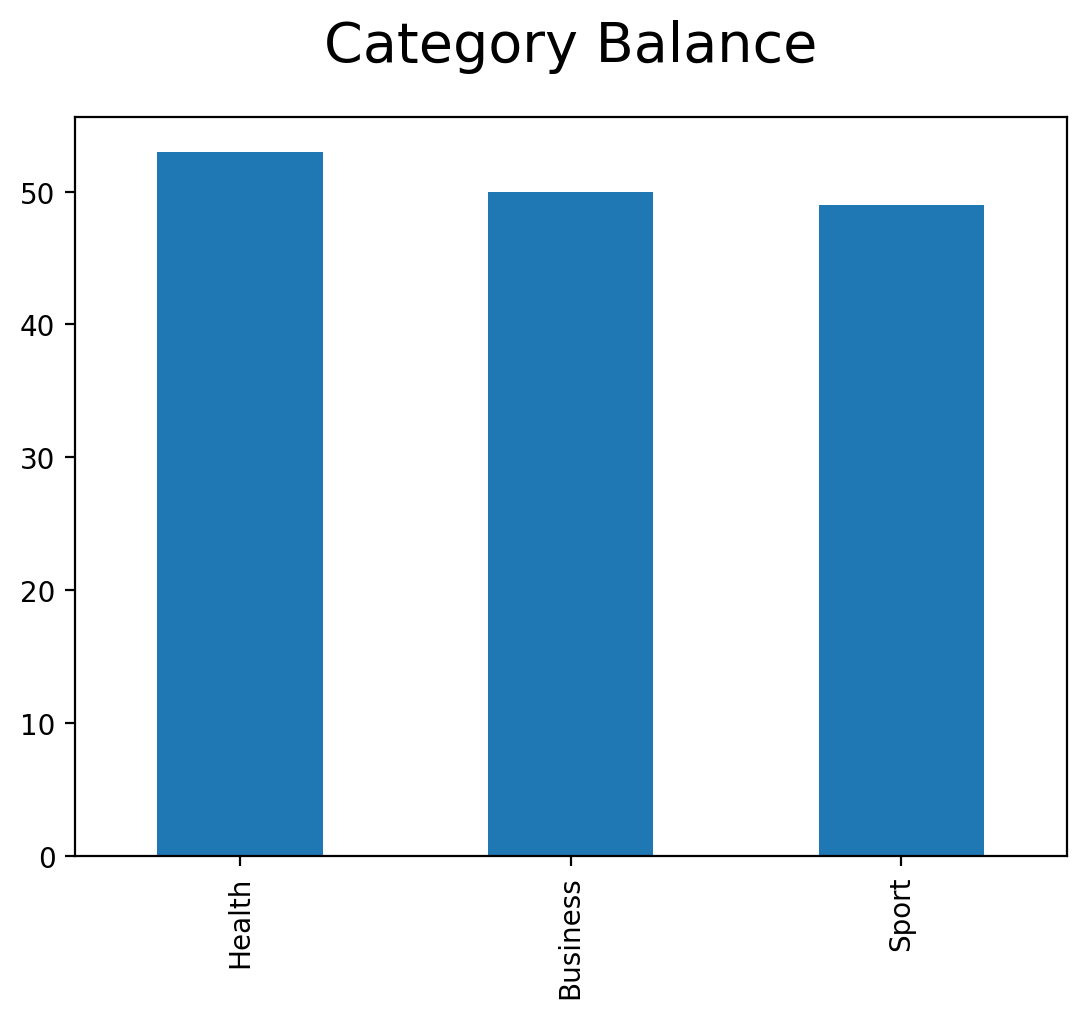

In [13]:
y_train.value_counts().plot(kind='bar')
plt.title('Category Balance', size=20, pad=20);

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(152,) (38,) (152,) (38,)


## 4.  Vectorize

The TfidfVectorizer is a useful tool for converting a collection of text documents into a matrix representation using the term frequency-inverse document frequency (TF-IDF) weighting scheme. It computes the TF-IDF scores for each word or n-gram in the documents, which are then used as features for machine learning models or other text analysis tasks.

In [15]:
vector = TfidfVectorizer(stop_words='english', 
                         ngram_range = (1,2),
                         min_df = 3,
                         max_df = 1.,
                         max_features = 1000)

## 5.  Construct Model

The fit_model function is a utility function that trains and evaluates a given model using cross-validation. It creates a pipeline by combining a vectorization step and the specified model. The pipeline allows for seamless data preprocessing and model training. The function performs cross-validation by splitting the training data into multiple folds and evaluates the model on each fold using various evaluation metrics such as accuracy, weighted F1-score, precision, and recall. The function returns the evaluation results, including the metrics for each fold and the training scores. This function is helpful for efficient model training, evaluation, and comparison, especially when working with text data. It simplifies the process of training and evaluating models while ensuring the robustness of the results through cross-validation.

In [16]:
def fit_model(model, model_name):
    line = Pipeline([('vectorize', vector), (model_name, model)])
    
    output = cross_validate(line, 
                            X_train, 
                            y_train, 
                            cv = KFold(shuffle = True, 
                                       n_splits = 3,  
                                       random_state = 9),
                            scoring = ('accuracy', 'f1_weighted','precision_weighted','recall_weighted'),           
                            return_train_score=True)
    return output

The code snippet fits and evaluates decision tree, ridge classifier, and Naive Bayes models using the fit_model function. It creates DataFrames from the evaluation results of each model and assigns them to dt, rc, and bc variables, respectively.

In [17]:
dectree = fit_model(DecisionTreeClassifier(), 'DTree')
ridge = fit_model(RidgeClassifier(), 'Ridge')
bayes = fit_model(MultinomialNB(), 'NB')

dt = pd.DataFrame.from_dict(dectree)
rc = pd.DataFrame.from_dict(ridge)
bc = pd.DataFrame.from_dict(bayes)

In [18]:
l1 = [bc, rc, dt]
l2 =["NB", "Ridge", "DT"]

for each, tag in zip(l1, l2):
    each['model'] = [tag, tag, tag]

joined_output = pd.concat([bc,rc,dt])

In [19]:
dectree

{'fit_time': array([0.01300526, 0.00582623, 0.00999999]),
 'score_time': array([0.01099229, 0.01000047, 0.00999999]),
 'test_accuracy': array([0.88235294, 0.94117647, 0.96      ]),
 'train_accuracy': array([1.        , 1.        , 0.99019608]),
 'test_f1_weighted': array([0.88376095, 0.94018586, 0.96006617]),
 'train_f1_weighted': array([1.        , 1.        , 0.99019976]),
 'test_precision_weighted': array([0.88801743, 0.9488491 , 0.96125   ]),
 'train_precision_weighted': array([1.        , 1.        , 0.99046841]),
 'test_recall_weighted': array([0.88235294, 0.94117647, 0.96      ]),
 'train_recall_weighted': array([1.        , 1.        , 0.99019608])}

In [20]:
ridge

{'fit_time': array([0.01499772, 0.01900172, 0.0139966 ]),
 'score_time': array([0.00900078, 0.01273394, 0.00600052]),
 'test_accuracy': array([0.98039216, 1.        , 0.92      ]),
 'train_accuracy': array([0.99009901, 0.99009901, 0.99019608]),
 'test_f1_weighted': array([0.98039216, 1.        , 0.91961372]),
 'train_f1_weighted': array([0.99010584, 0.99009459, 0.9901887 ]),
 'test_precision_weighted': array([0.98142415, 1.        , 0.92692308]),
 'train_precision_weighted': array([0.99040842, 0.9903819 , 0.99044746]),
 'test_recall_weighted': array([0.98039216, 1.        , 0.92      ]),
 'train_recall_weighted': array([0.99009901, 0.99009901, 0.99019608])}

In [21]:
bayes

{'fit_time': array([0.00600123, 0.00499964, 0.00730276]),
 'score_time': array([0.00664282, 0.0069983 , 0.00600314]),
 'test_accuracy': array([0.98039216, 1.        , 0.92      ]),
 'train_accuracy': array([0.98019802, 0.98019802, 0.99019608]),
 'test_f1_weighted': array([0.98039216, 1.        , 0.91961372]),
 'train_f1_weighted': array([0.98020485, 0.98019588, 0.9901887 ]),
 'test_precision_weighted': array([0.98142415, 1.        , 0.92692308]),
 'train_precision_weighted': array([0.98050743, 0.98048091, 0.99044746]),
 'test_recall_weighted': array([0.98039216, 1.        , 0.92      ]),
 'train_recall_weighted': array([0.98019802, 0.98019802, 0.99019608])}

In [22]:
relevant_measures = list(['test_accuracy','test_precision_weighted', 'test_recall_weighted', 'test_f1_weighted'])

dec_tree_metrics = joined_output.loc[joined_output.model == 'DT'][relevant_measures]
nb_metrics = joined_output.loc[joined_output.model == 'NB'][relevant_measures]
r_metrics = joined_output.loc[joined_output.model == 'Ridge'][relevant_measures]

#### Decision Tree metrics

In [23]:
dec_tree_metrics

,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
0,0.882353,0.888017,0.882353,0.883761
1,0.941176,0.948849,0.941176,0.940186
2,0.960000,0.961250,0.960000,0.960066


#### Multinomial Naive Bayes metrics

In [24]:
nb_metrics

,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
0,0.980392,0.981424,0.980392,0.980392
1,1.000000,1.000000,1.000000,1.000000
2,0.920000,0.926923,0.920000,0.919614


#### Ridge Classifier metrics

In [25]:
r_metrics

,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
0,0.980392,0.981424,0.980392,0.980392
1,1.000000,1.000000,1.000000,1.000000
2,0.920000,0.926923,0.920000,0.919614


#### Average metrics

In [26]:
metrics_ = [dec_tree_metrics, nb_metrics, r_metrics]
names_ = ['Decision Tree', 'Naive Bayes', 'Ridge Classifier']

for scores, namess in zip(metrics_, names_):
    print(f'{namess} Mean Metrics:')
    print(scores.mean())
    print('  ')

Decision Tree Mean Metrics:
test_accuracy              0.927843
test_precision_weighted    0.932706
test_recall_weighted       0.927843
test_f1_weighted           0.928004
dtype: float64
  
Naive Bayes Mean Metrics:
test_accuracy              0.966797
test_precision_weighted    0.969449
test_recall_weighted       0.966797
test_f1_weighted           0.966669
dtype: float64
  
Ridge Classifier Mean Metrics:
test_accuracy              0.966797
test_precision_weighted    0.969449
test_recall_weighted       0.966797
test_f1_weighted           0.966669
dtype: float64
  


### Selection of Model
From the metrics obtained, the Ridge Classifier appears to perform the best among the models tested. However, the Multinomial Naive Bayes classifier is chosen as the final model because it has the added advantage of providing probability scores for each prediction it makes. Despite slightly lower scores compared to the Ridge Classifier, the ability to obtain probability scores is deemed valuable in certain applications or decision-making scenarios.

In [27]:
# Join training and test datasets
X = pd.concat([X_train, 
               X_test])
y = pd.concat([y_train, 
               y_test])

In [28]:
def create_and_fit(clf, x, y):
    best_clf = clf
    pipeline = Pipeline([('vectorize', vector), ('model', best_clf)])
    return pipeline.fit(x, y)

In [29]:
# Create model
CLASSYfier = create_and_fit(MultinomialNB(), X, y)

In [30]:
CLASSYfier.classes_

array(['Business', 'Health', 'Sport'], dtype='<U8')

## FINAL TESTING:

### PASSING DATA
 - The World Economic Forum is the International Organization for Public-Private Cooperation. We believe that progress happens by bringing together people from all walks of life who have the drive and the influence to make positive change.

In [31]:
input_text = 'The World Economic Forum is the International Organization for Public-Private Cooperation. We believe that progress happens by bringing together people from all walks of life who have the drive and the influence to make positive change.'
CLASSYfier.predict_proba([input_text])

array([[0.32105263, 0.36315789, 0.31578947]])

In [32]:
CLASSYfier.predict([input_text])[0]

'Health'

Interestingly, since the streaming services are also businesses, the model reflects this with a `0.39` probability for the business category.

## GUI

This is the web application made using Flask, html and css.

Flask is a lightweight framework for building web applications in Python. It provides a simple and flexible way to create dynamic web pages, handle user input, and integrate with databases and other services. HTML and CSS are the standard languages for defining the structure and style of web pages. By using Flask, html and css, we can create a web application that is fast, responsive, and easy to maintain.

The following code snippet helps to create a simple web server in Python that can handle GET and POST requests. The web server listens on port 8080 and returns a HTML page with a html page for GET requests. For POST requests, the web server parses the query parameters and vertical search perform and result is send as reponse.

### XML REQUEST

     XML request handler is use to query the server without reloading the page every time. This improves the user experience and reduces the   network traffic.
   

In [ ]:
from flask import Flask, request, render_template_string
from flask import Flask, render_template_string, request
from markupsafe import Markup
from IPython.display import display, HTML

app = Flask(__name__)

search_history = '';


def classify_text(input_text):
    probabilities = CLASSYfier.predict_proba([input_text])
    rating={}
    rating[CLASSYfier.classes_[0]]=round(probabilities[0][0]*100,2)
    rating[CLASSYfier.classes_[1]]=round(probabilities[0][1]*100,2)
    rating[CLASSYfier.classes_[2]]=round(probabilities[0][2]*100,2)
    rating=sorted(rating.items(), key=lambda x: x[1], reverse=True)
    return rating

def perform_search(query):  
    if query == '' :
        return '';
    rating = classify_text(query)
    result = "<table class='table'><tr><th>CATAGORY</th><th>PROBABILITY</th></tr>"
    for item in rating:
        result =result+'<tr><td>'+item[0]+'.</td><td>'+str(item[1])+'%.</td></tr>';
    result=result+'</table>';
    return result


# Define a route for the home page
@app.route('/', methods=['GET', 'POST'])
def home():
    html_str='''<html>
    <head>
    <title>Bipluck Shrestha</title>
        <script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.5.1/jquery.min.js" crossorigin="anonymous"></script>
        <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.1.1/dist/css/bootstrap.min.css" crossorigin="anonymous">
        </head>
        <body>
        
          <div class="text-center p-4 " style="background-color: rgba(0, 0, 0, 0.05);">
            Submitted by : Bipluck Shrestha  
            <a class="text-reset fw-bold" href="https://pureportal.coventry.ac.uk/">Coventry University</a>
          </div>
          <nav class="navbar navbar-light" style="background-color: #e3f2fd;">
            <a class="text-reset fw-bold text-success" href="http://localhost:8080">SEARCH ENGINE</a>
            <a class="text-reset fw-bold text-primary" href="http://localhost:5050">TEXT CLASSIFICATION</a>
          </nav>
        <div class="container">
        <br/>
        <div class="row justify-content-center">
                            <div class="col-12 col-md-10 col-lg-8">
                                <div class="card card-sm">
                                        <div class="card-body row no-gutters align-items-center">
                                        <div class="col-auto">
                                            <i class="fas fa-search h4 text-body"></i>
                                        </div>
                                        <hr>
                                        <hr>
                                        <hr>
                                        <div class="col">
                                            <textarea rows='4' list='indexs' id="search_input" name='query' class="form-control form-control-lg form-control-borderless" onkeyup='onEnterProcess(event)' type="search" placeholder="Search topics or keywords"></textarea>
                                        </div>
                                        <div class="col-auto">
                                            <button class="btn btn-lg btn-success" type="submit" onclick='getResult()'>Search</button>
                                        </div>
                                </div>
                            </div>
                        </div>
        </div>
        <div id='search_result'>
        </div>
  ''';
    
    if request.method == 'POST':
        query = request.form['query']
        results = perform_search(query)
        return Markup(results)
    
    html_str=html_str+render_template_string('''<script>{{ jscode }}</script>
        <style> {{ csscode }}
        </style>''',jscode=Markup(open('local.js','r').read()),csscode=Markup(open('local.css','r').read()));
    
    html_str=html_str+'''
    
    
    </body></html>'''
    return html_str

# Run the application
if __name__ == '__main__':
    app.run(port=5050) 
    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5050
Press CTRL+C to quit


# OUTOUT

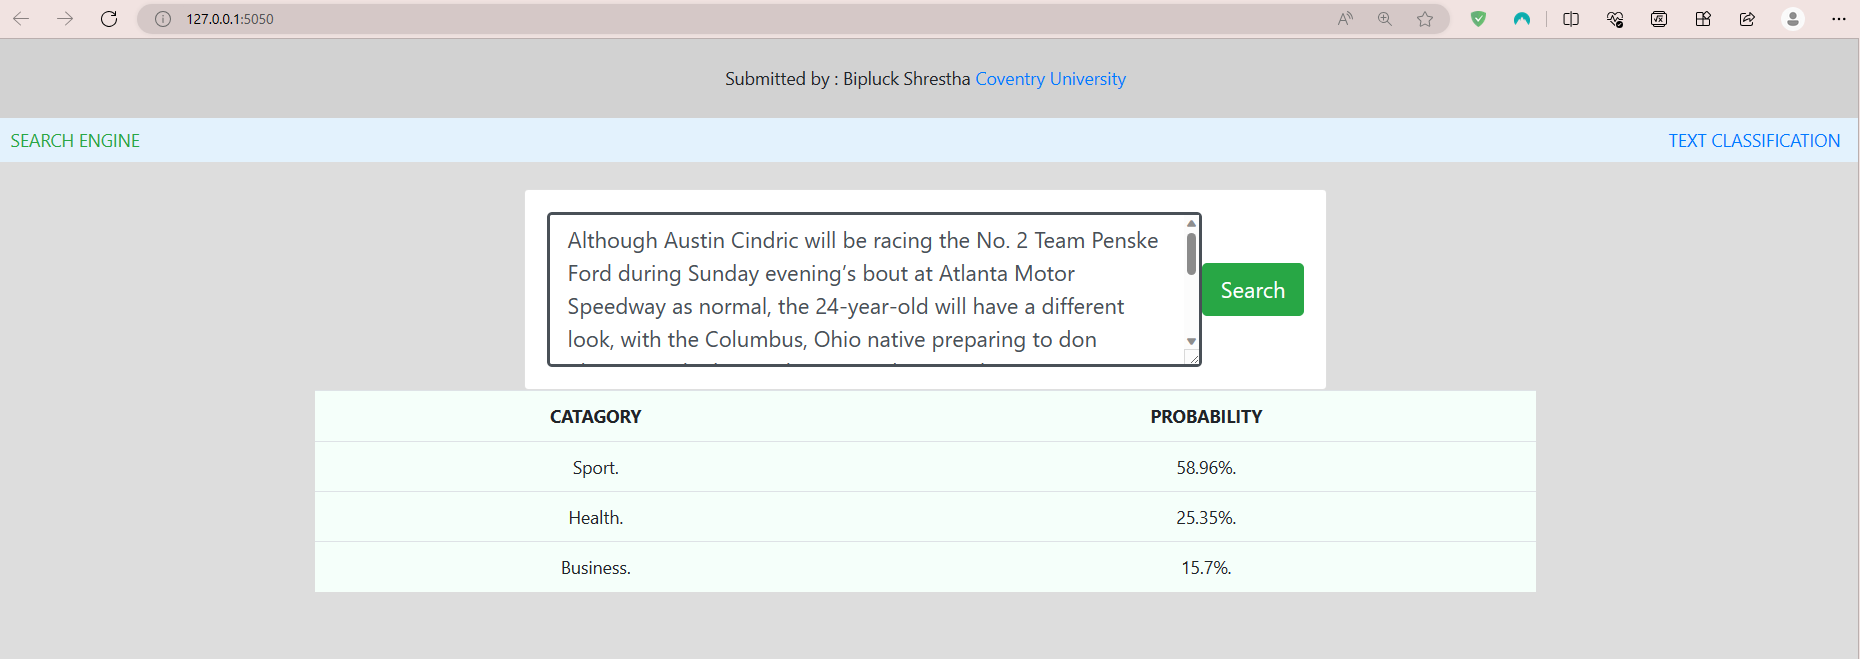

In [ ]:
# CONCLUSION

In summary, scientific documents need to be categorized by subject area, such as health, business, and sport, to enable effective information retrieval and knowledge discovery. A subject classification functionality, either as a separate software or integrated with a search engine, can accurately identify the subject areas of study and provide useful insights. This functionality can help researchers, professionals, and enthusiasts find the most relevant resources in their respective fields and support further developments in these important areas of study.